# Terninger

**Forskningsspørsmål:** Er terningene rettferdige?


<img src="https://upload.wikimedia.org/wikipedia/commons/e/e5/Dice_%28typical_role_playing_game_dice%29.jpg" width="700" height="500" />

## Urettferdig terning

Dersom man ikke har like stor sannsynlighet for å få hvert enkelt tall på terningen, sier vi terningen er urettferdig.
Det kan være flere ulike årsaker til at en terning er urettferdig, for eksempel
- Skjult lodd i terningen
- Ujevn geometrisk form
- Slipte kanter

Man kan undersøke terningene for å finne ut om de er rettferdige. Vi tester heller dette empirisk med et eksperiment.
Dette betyr at vi må bruke terningene mange ganger og kontrollere om de oppfører som forventet.

## Gjennomføring av eksperiment

Vi velger tre terninger:
- Blå (fire sider)
- Oransje (seks sider)
- Grønn (åtte sider)

Terningene trilles 100 ganger:
- Resultater noteres i filen "eksperimentdata.csv".
- Vi lager figurer og tabeller
- Vi sammenligner med forventede verdier for hver terning.
- Vi gjennomfører hypotesetester basert på [Kjikvadratfordelingen](https://en.wikipedia.org/wiki/Chi-squared_distribution) og konkluderer.

All analyse gjennomføres i programmeringsspråket [Python](https://www.python.org/)

# Importer Python-moduler og eksperimentdata

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chisquare
import itertools
plt.rcParams['figure.figsize'] = [15, 8]

In [2]:
data = pd.read_csv('eksperimentdata.csv', sep=";", index_col=0)
data.head(10)

Terning_4  Terning_6  Terning_8
Kast                                 
1             1          6          4
2             4          5          1
3             2          5          6
4             2          1          5
5             4          5          8
6             4          2          2
7             3          1          3
8             2          2          4
9             1          1          1
10            3          6          7

# Verdiene vi fikk på alle terningskast

In [3]:
data.plot.bar(subplots=True, legend=False);

## Telling av verdiene vi fikk og sammenligning med hva vi forventer for rettferdige terninger

Vi forventer å se like mange observasjoner av de ulike verdiene for rettferdige terninger.
- 100/4 = 25 for terning med fire sider
- 100/6 = 16.7 for terning med seks sider
- 100/8 = 12.5 for terning med åtte sider

In [4]:
Terning_4 = pd.DataFrame({'Observert':data.Terning_4.value_counts(), 'Forventet':list(itertools.repeat(100/4,4))})
Terning_6 = pd.DataFrame({'Observert':data.Terning_6.value_counts(), 'Forventet':list(itertools.repeat(100/6,6))})
Terning_8 = pd.DataFrame({'Observert':data.Terning_8.value_counts(), 'Forventet':list(itertools.repeat(100/8,8))})

Terning_4['Differanse'] = (Terning_4.Forventet-Terning_4.Observert)
Terning_6['Differanse'] = (Terning_6.Forventet-Terning_6.Observert)
Terning_8['Differanse'] = (Terning_8.Forventet-Terning_8.Observert)

Terning_4['(Differanse^2)/Forventet'] = (Terning_4.Forventet-Terning_4.Observert)**2/Terning_4.Forventet
Terning_6['(Differanse^2)/Forventet'] = (Terning_6.Forventet-Terning_6.Observert)**2/Terning_6.Forventet
Terning_8['(Differanse^2)/Forventet'] = (Terning_8.Forventet-Terning_8.Observert)**2/Terning_8.Forventet

# Resultater for terning med fire sider

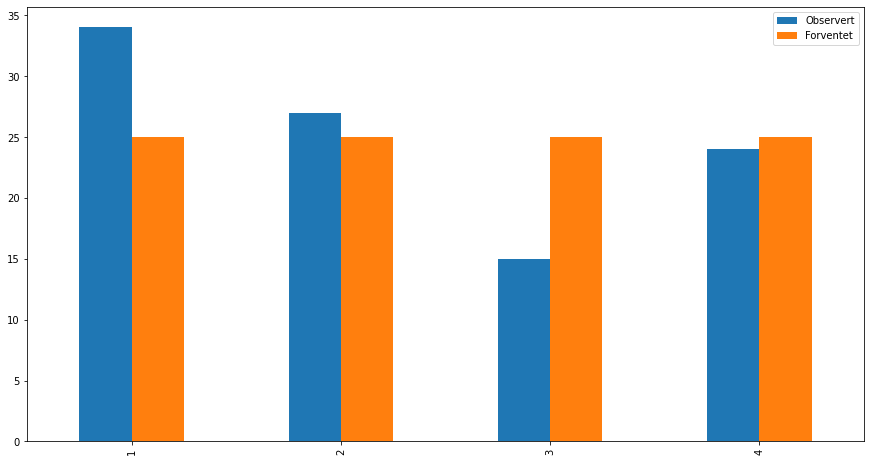

In [5]:
Terning_4[['Observert', 'Forventet']].sort_index().plot.bar();

In [6]:
Terning_4

Observert  Forventet  Differanse  (Differanse^2)/Forventet
1         34       25.0        -9.0                      3.24
2         27       25.0        -2.0                      0.16
4         24       25.0         1.0                      0.04
3         15       25.0        10.0                      4.00

### Hypotesen H_04: Terningen er rettferdig

Vi klarer ikke å forkaste denne siden p-verdien er over 5%. Dette betyr at terningen er rettferdig.

In [7]:
chisquare(f_obs=Terning_4.Observert, f_exp=Terning_4.Forventet)

Power_divergenceResult(statistic=7.44, pvalue=0.05912031649806227)

Vi kan kontrollere ved å legge sammen tallene i den siste kolonnen over. Summen blir 7.44.

In [8]:
round(Terning_4.sum(), 2)

Observert                   100.00
Forventet                   100.00
Differanse                    0.00
(Differanse^2)/Forventet      7.44
dtype: float64

# Resultater for terning med seks sider

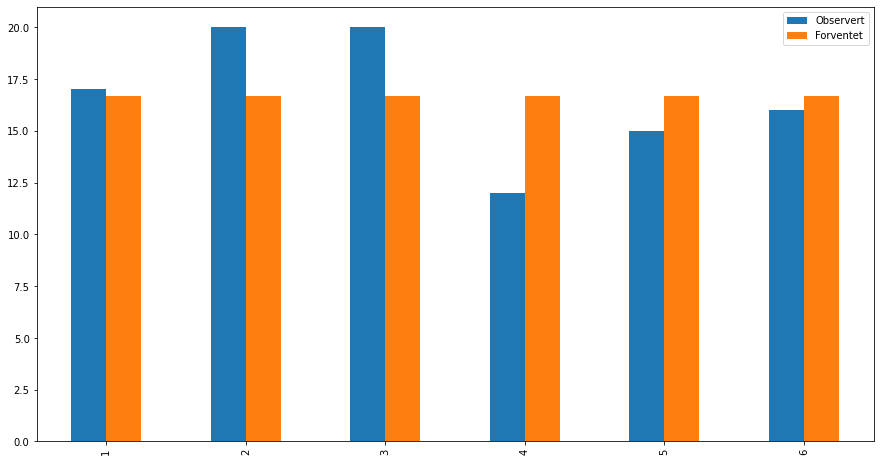

In [9]:
Terning_6[['Observert', 'Forventet']].sort_index().plot.bar();

In [10]:
Terning_6.sort_index()

Observert  Forventet  Differanse  (Differanse^2)/Forventet
1         17  16.666667   -0.333333                  0.006667
2         20  16.666667   -3.333333                  0.666667
3         20  16.666667   -3.333333                  0.666667
4         12  16.666667    4.666667                  1.306667
5         15  16.666667    1.666667                  0.166667
6         16  16.666667    0.666667                  0.026667

### Hypotesen H_06: Terningen er rettferdig

Vi klarer ikke å forkaste denne siden p-verdien er over 5%. Dette betyr at terningen er rettferdig.

In [11]:
chisquare(f_obs=Terning_6.Observert, f_exp=Terning_6.Forventet)

Power_divergenceResult(statistic=2.84, pvalue=0.7246366749552865)

Vi kan kontrollere ved å legge sammen tallene i den siste kolonnen over. Summen blir 2.84.

In [12]:
round(Terning_6.sum(), 2)

Observert                   100.00
Forventet                   100.00
Differanse                    0.00
(Differanse^2)/Forventet      2.84
dtype: float64

# Resultater for terning med åtte sider

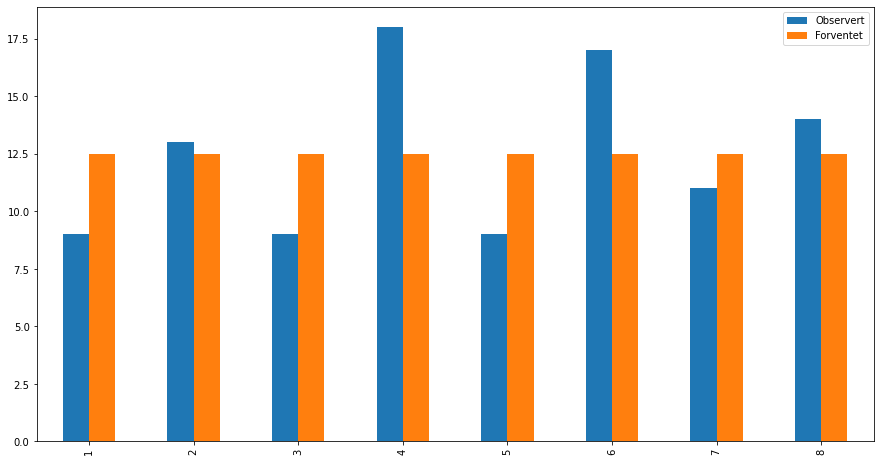

In [13]:
Terning_8[['Observert', 'Forventet']].sort_index().plot.bar();

In [14]:
Terning_8.sort_index()

Observert  Forventet  Differanse  (Differanse^2)/Forventet
1          9       12.5         3.5                      0.98
2         13       12.5        -0.5                      0.02
3          9       12.5         3.5                      0.98
4         18       12.5        -5.5                      2.42
5          9       12.5         3.5                      0.98
6         17       12.5        -4.5                      1.62
7         11       12.5         1.5                      0.18
8         14       12.5        -1.5                      0.18

### Hypotesen H_08: Terningen er rettferdig

Vi klarer ikke å forkaste denne siden p-verdien er over 5%. Dette betyr at terningen er rettferdig.

In [15]:
chisquare(f_obs=Terning_8.Observert, f_exp=Terning_8.Forventet)

Power_divergenceResult(statistic=7.36, pvalue=0.39238299814365213)

Vi kan kontrollere ved å legge sammen tallene i den siste kolonnen over. Summen blir 7.36

In [16]:
round(Terning_8.sum(), 2)

Observert                   100.00
Forventet                   100.00
Differanse                    0.00
(Differanse^2)/Forventet      7.36
dtype: float64

# Konklusjon

#### Hypotesene H_04, H_06 og H_08 blir ikke forkastet. Dette betyr at vi konkluderer med at terningene er rettferdige.